In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df=pd.read_csv('survey lung cancer.csv')

In [4]:
df
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [6]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'GENDER': ['M' 'F']
Unique values in column 'AGE': [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values in column 'SMOKING': [1 2]
Unique values in column 'YELLOW_FINGERS': [2 1]
Unique values in column 'ANXIETY': [2 1]
Unique values in column 'PEER_PRESSURE': [1 2]
Unique values in column 'CHRONIC DISEASE': [1 2]
Unique values in column 'FATIGUE ': [2 1]
Unique values in column 'ALLERGY ': [1 2]
Unique values in column 'WHEEZING': [2 1]
Unique values in column 'ALCOHOL CONSUMING': [2 1]
Unique values in column 'COUGHING': [2 1]
Unique values in column 'SHORTNESS OF BREATH': [2 1]
Unique values in column 'SWALLOWING DIFFICULTY': [2 1]
Unique values in column 'CHEST PAIN': [2 1]
Unique values in column 'LUNG_CANCER': ['YES' 'NO']


In [7]:
df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})

df.rename(columns={'CHRONIC DISEASE': 'CHRONIC_DISEASE'}, inplace=True)
df.rename(columns={'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING'}, inplace=True)
df.rename(columns={'SHORTNESS OF BREATH': 'SHORTNESS_OF_BREATH'}, inplace=True)
df.rename(columns={'SWALLOWING DIFFICULTY': 'SWALLOWING_DIFFICULTY'}, inplace=True)
df.rename(columns={'CHEST PAIN': 'CHEST_PAIN'}, inplace=True)


                       LUNG_CANCER
GENDER                    0.067254
AGE                       0.089465
SMOKING                   0.058179
YELLOW_FINGERS            0.181339
ANXIETY                   0.144947
PEER_PRESSURE             0.186388
CHRONIC_DISEASE           0.110891
FATIGUE                   0.150673
ALLERGY                   0.327766
WHEEZING                  0.249300
ALCOHOL_CONSUMING         0.288533
COUGHING                  0.248570
SHORTNESS_OF_BREATH       0.060738
SWALLOWING_DIFFICULTY     0.259730
CHEST_PAIN                0.190451
LUNG_CANCER               1.000000


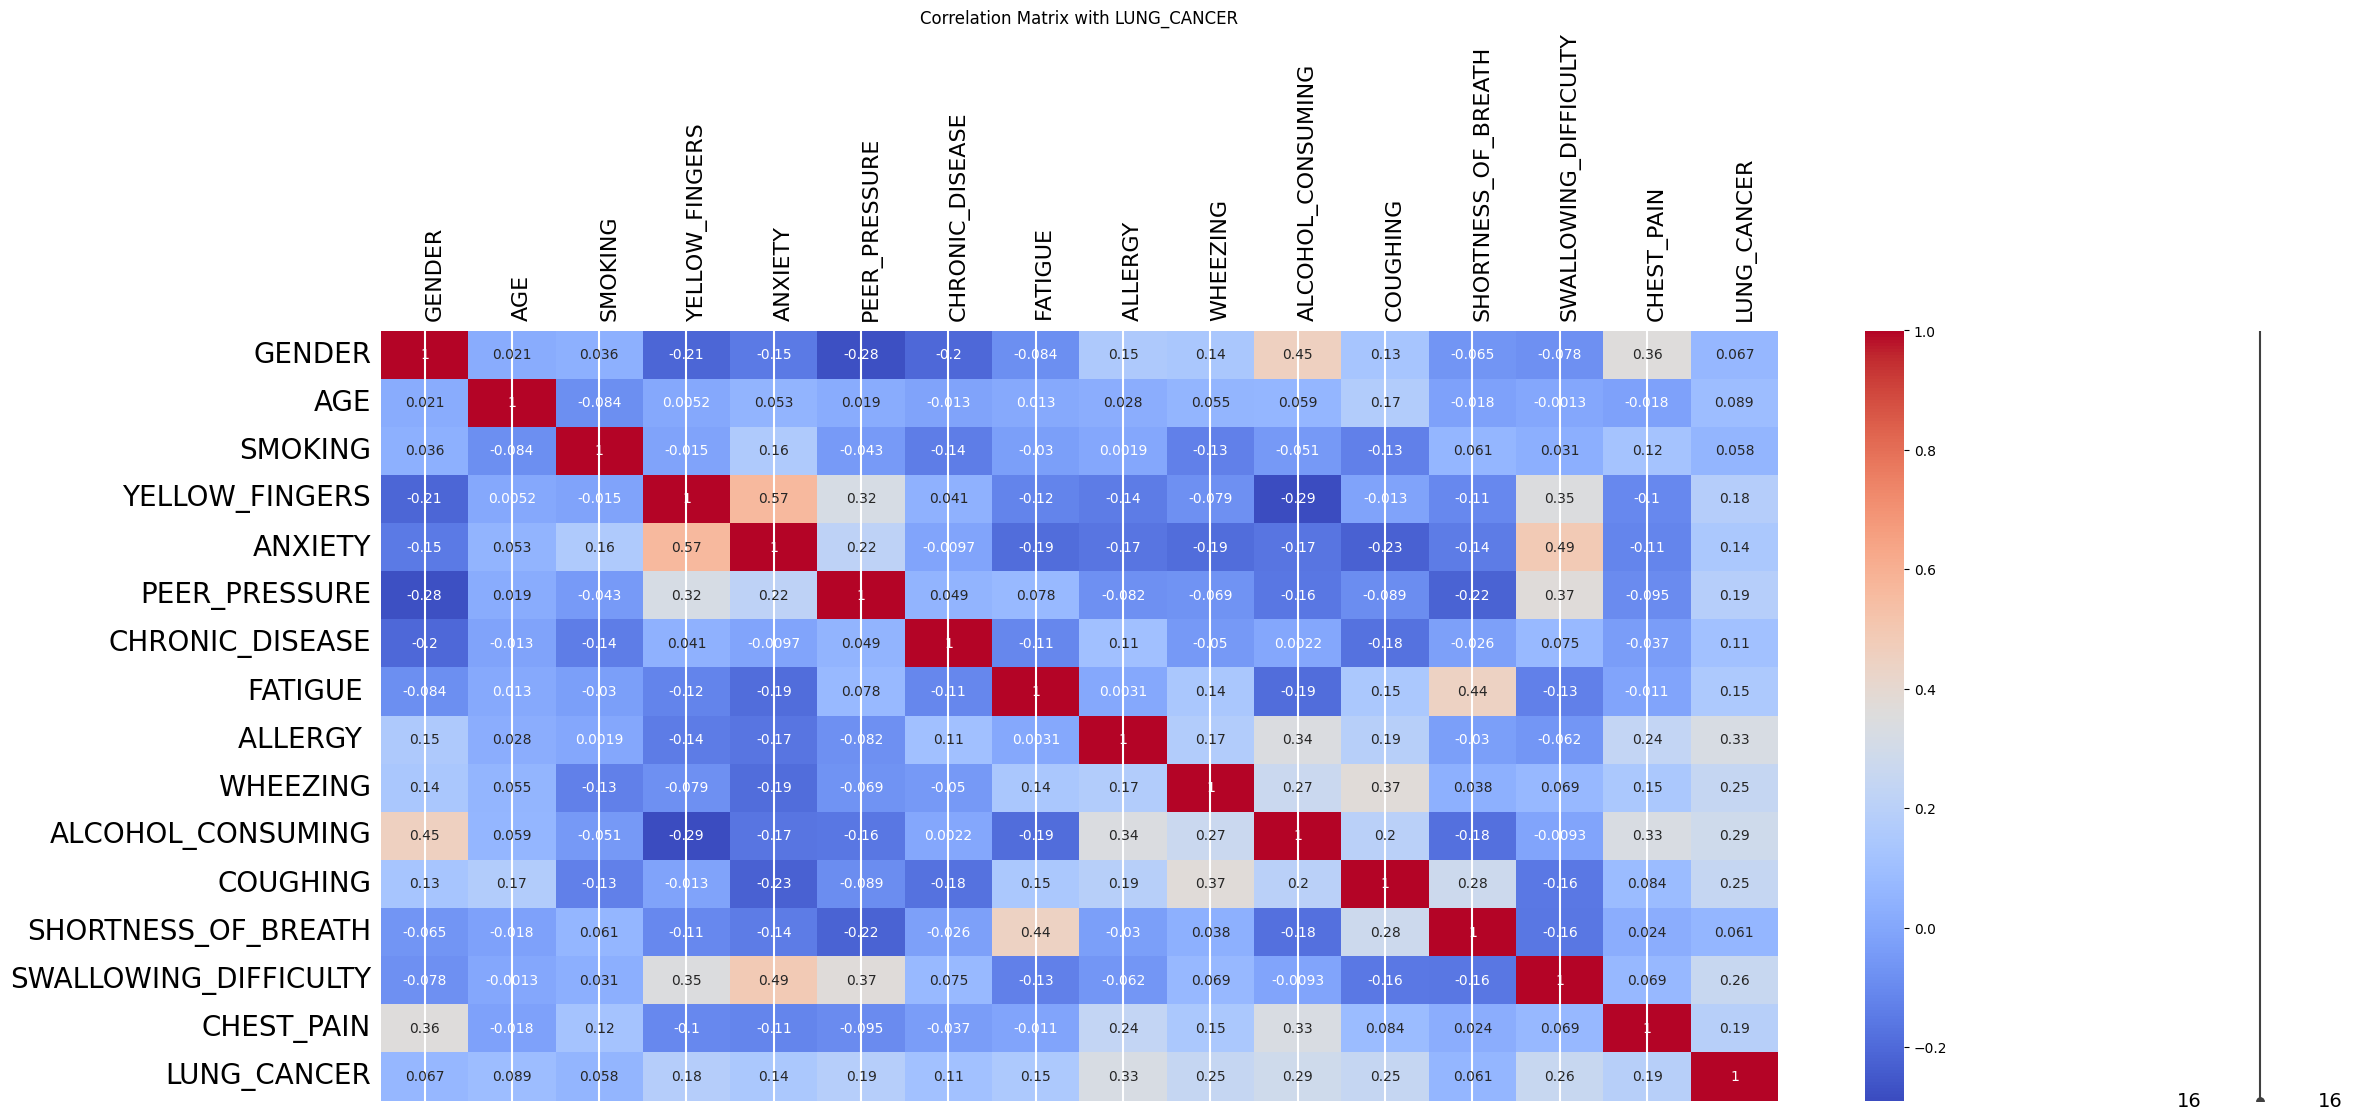

In [8]:
msno.matrix(df)

chosen_column = "LUNG_CANCER" 

# for col in df.columns:
#     if col != chosen_column:
#         plt.scatter(df[chosen_column], df[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = df.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

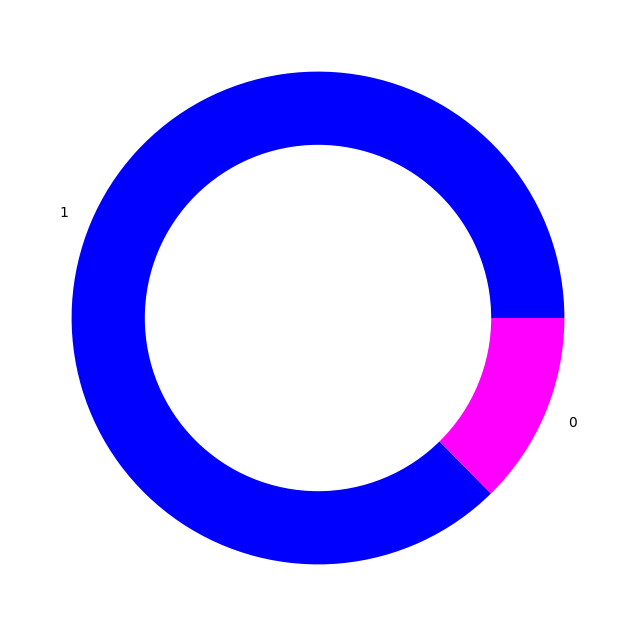

In [9]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.LUNG_CANCER.value_counts(), labels=[1, 0], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [10]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = df[df['LUNG_CANCER'] == 1]
data_2 = df[df['LUNG_CANCER'] == 0]

In [11]:
df.shape

(309, 16)

In [12]:
400 / 7

57.142857142857146

In [13]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)



df = pd.concat([data_1_resample, data_2_resample])


df.sample(40)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
220,0,57,1,1,2,2,2,2,2,2,2,1,2,2,2,1
207,1,63,2,1,1,2,1,1,1,1,1,2,2,1,1,0
249,1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
21,0,64,1,2,2,2,1,1,2,2,1,2,1,2,1,1
19,0,61,1,1,1,1,2,2,1,1,1,1,2,1,1,0
90,0,62,1,1,1,2,1,1,1,2,2,1,1,2,2,1
254,1,74,1,2,1,1,2,2,2,2,2,2,2,1,2,1
34,1,59,1,2,2,1,1,1,1,1,1,1,1,2,2,0
156,1,47,2,2,1,1,2,1,1,1,1,1,1,1,2,0


(400, 16)


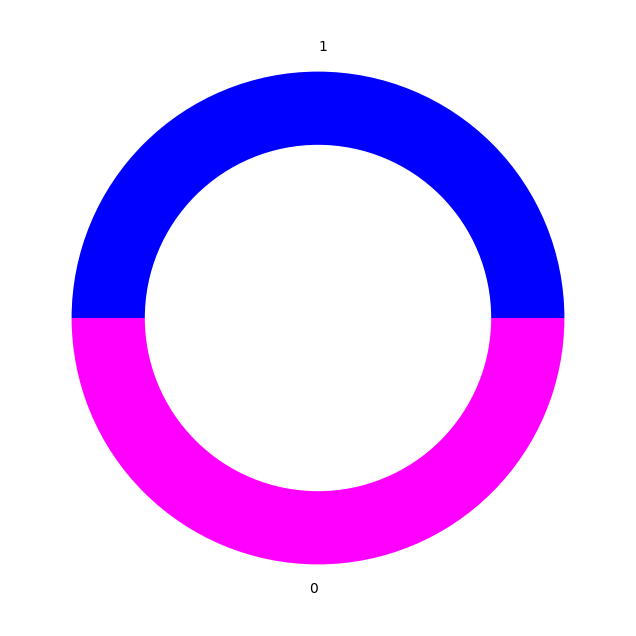

In [14]:
print(df.shape)
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.LUNG_CANCER.value_counts(), labels=[1, 0], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

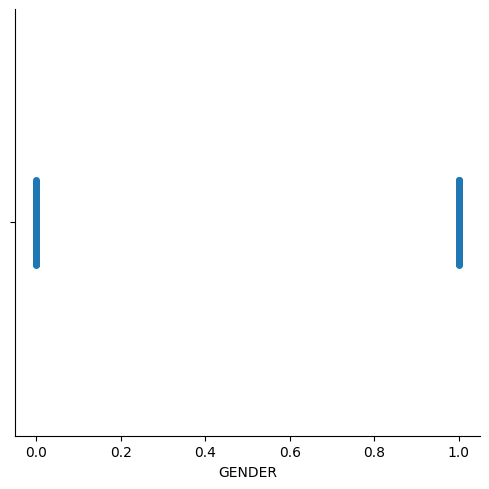

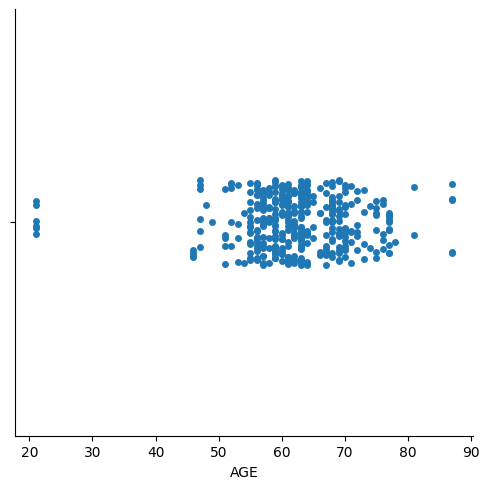

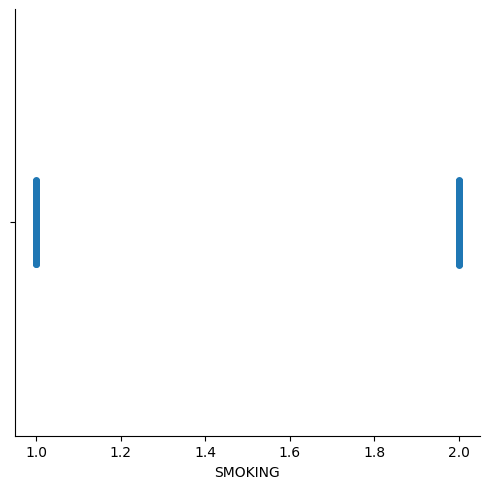

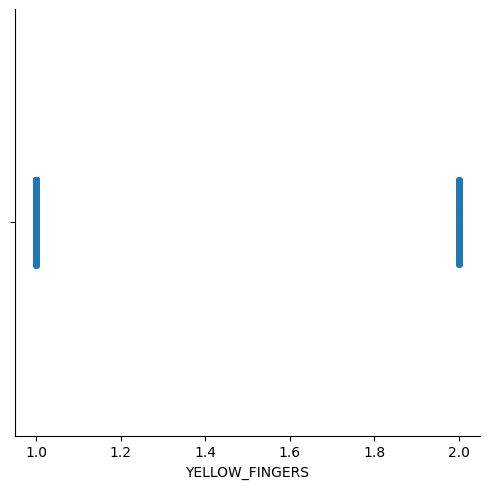

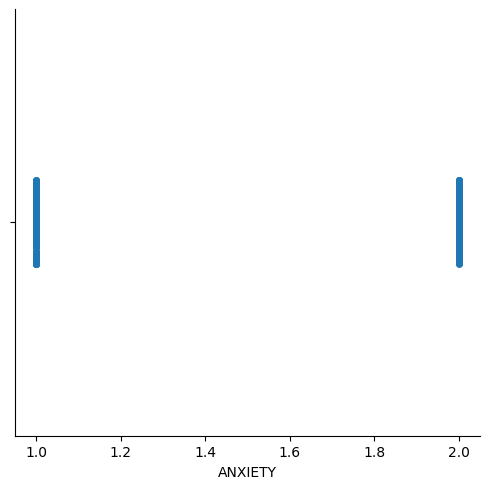

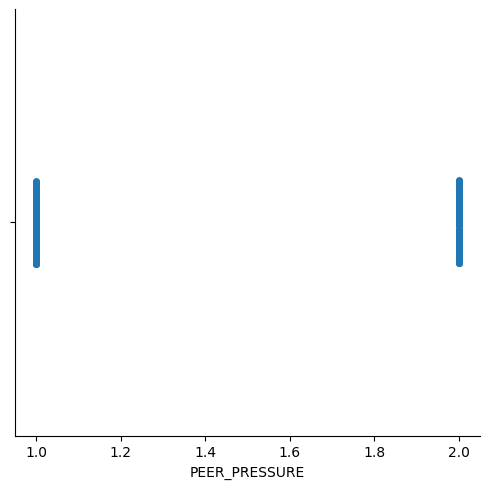

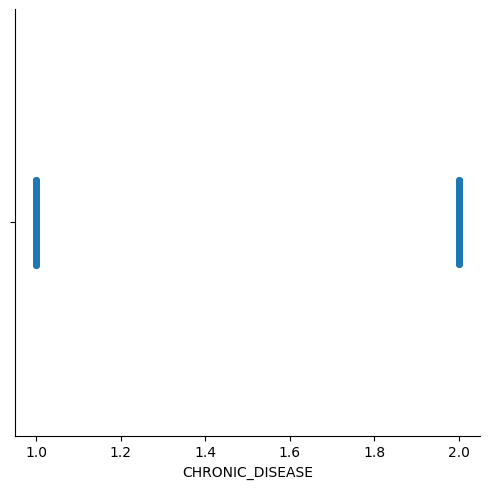

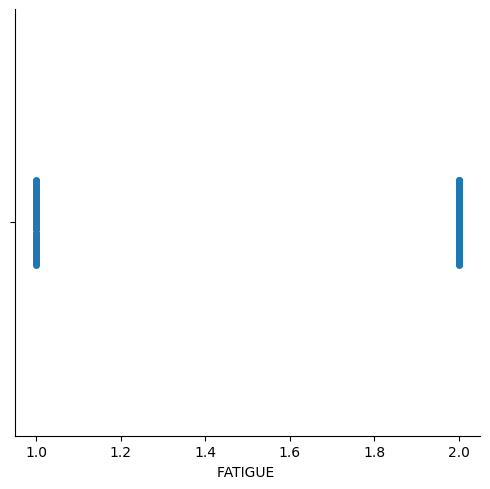

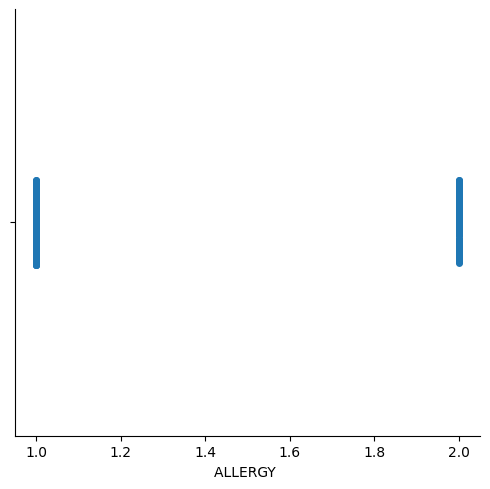

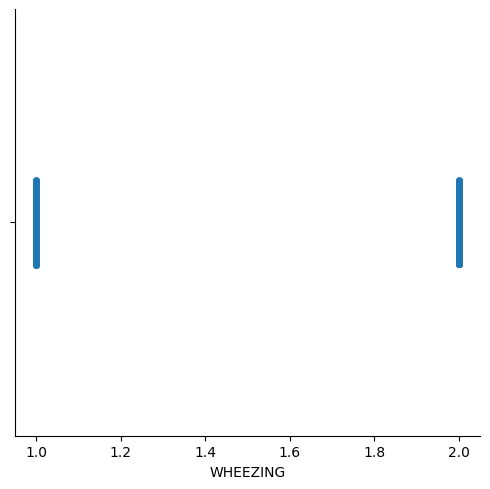

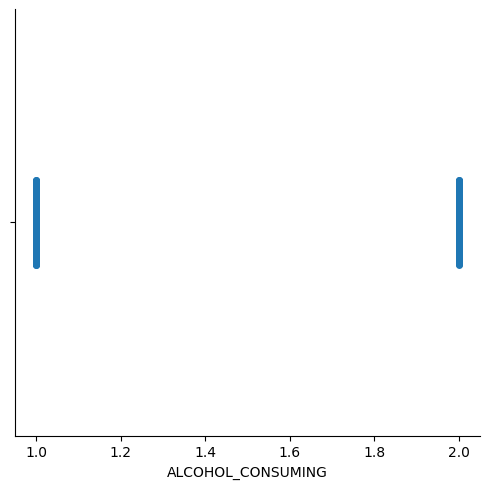

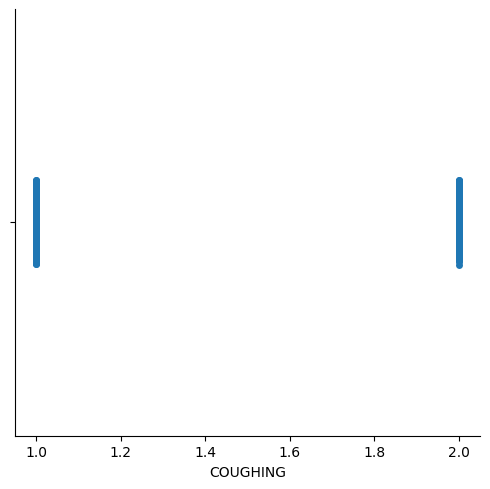

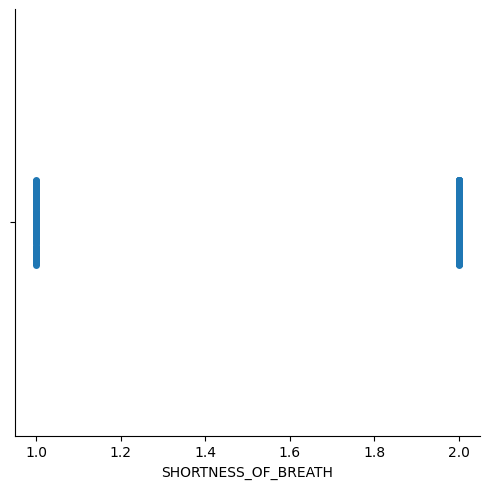

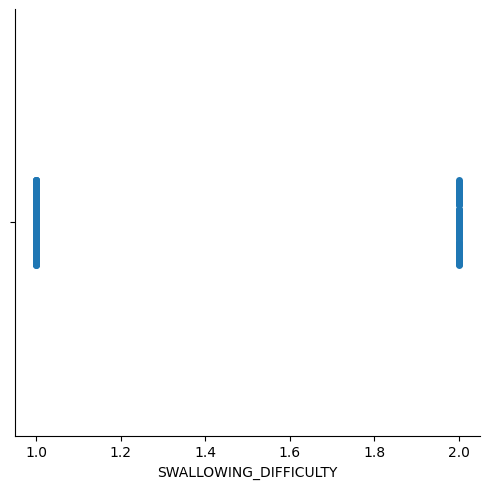

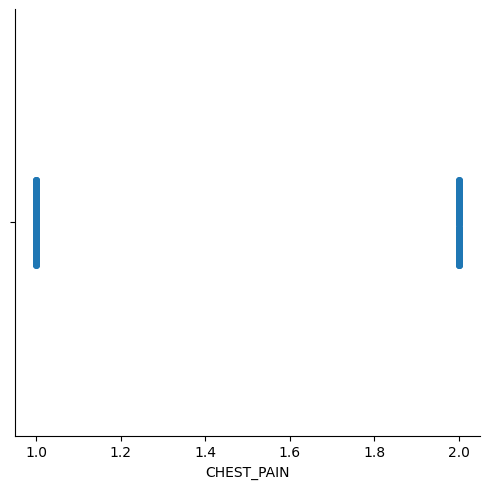

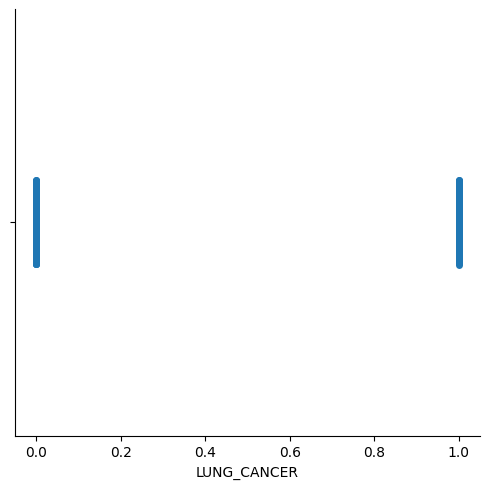

In [15]:
for col in df.columns:
    sns.catplot(x = col, data = df)

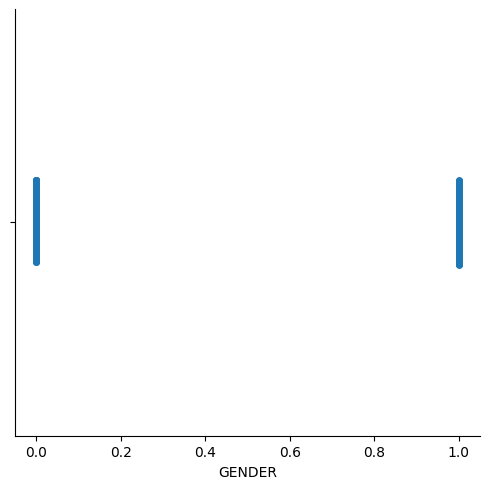

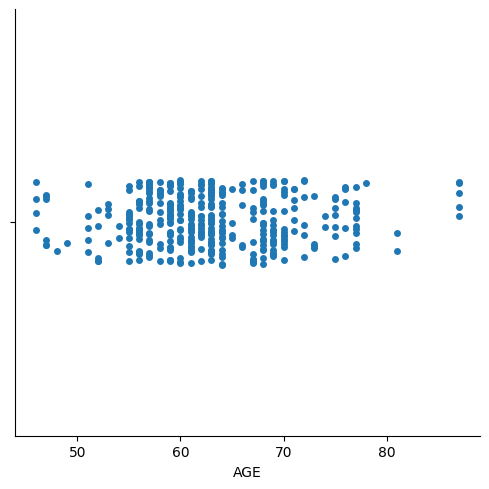

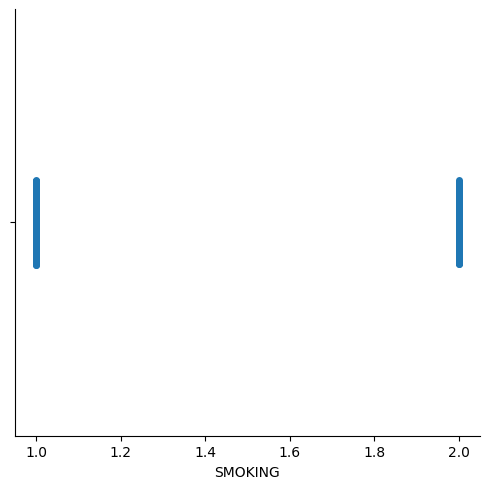

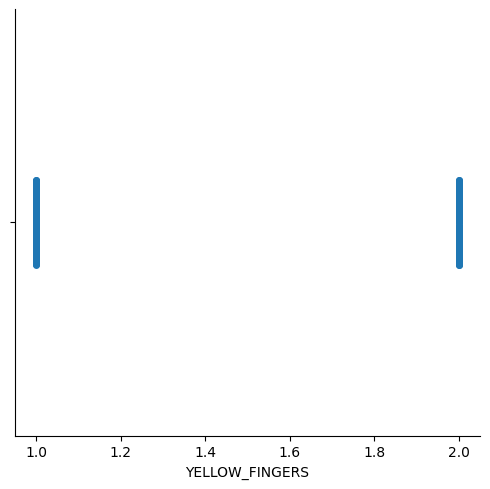

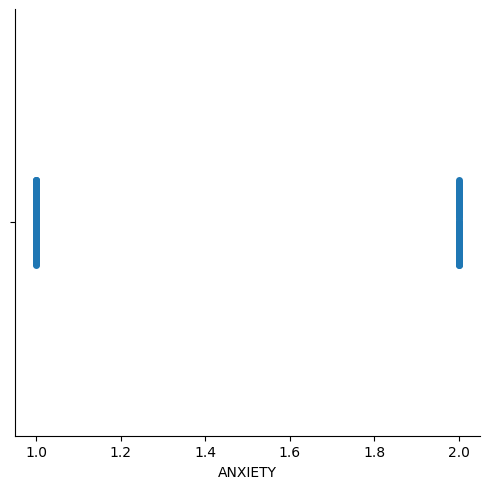

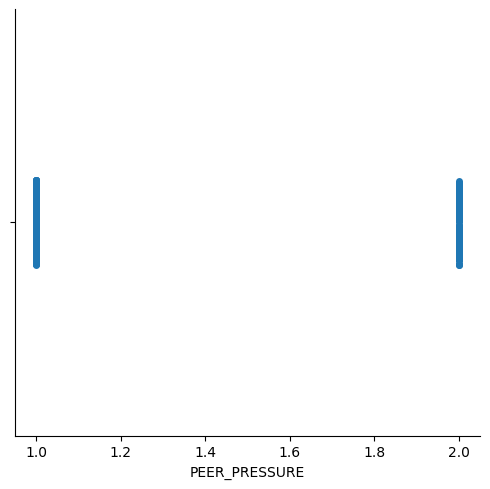

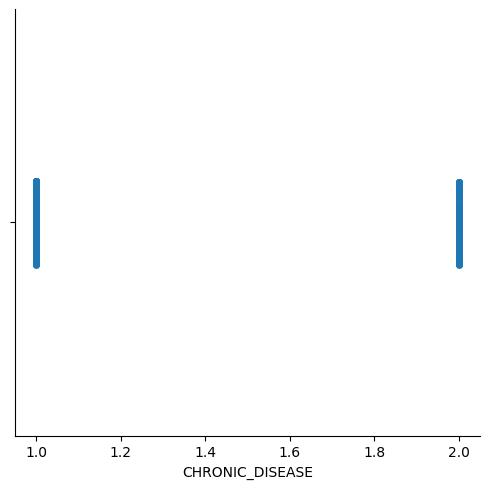

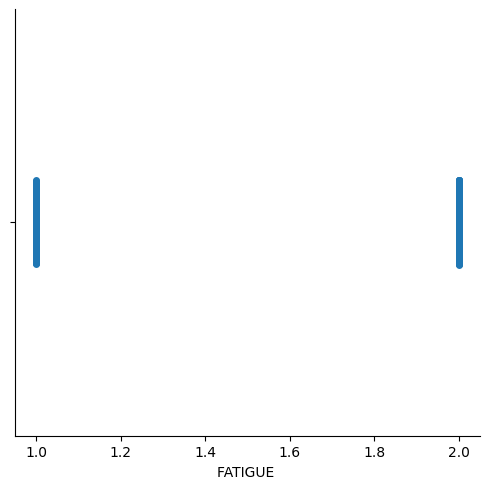

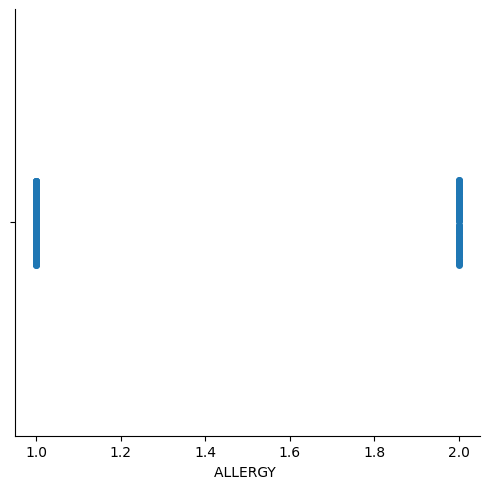

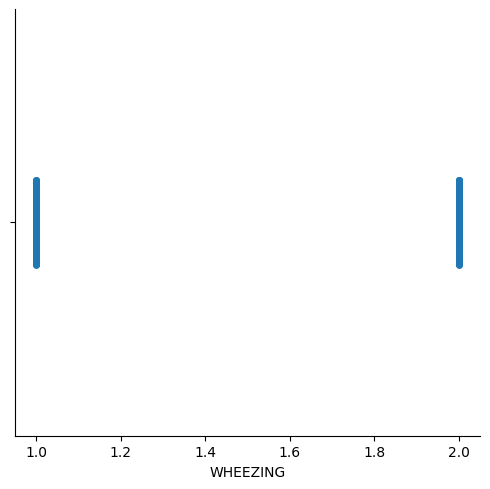

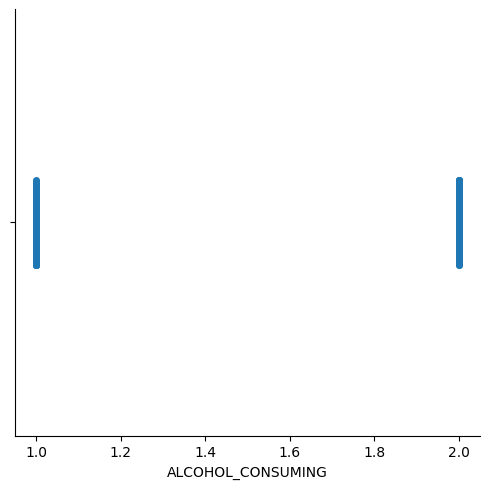

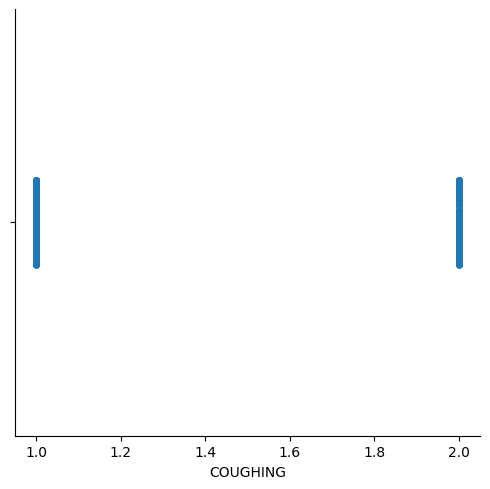

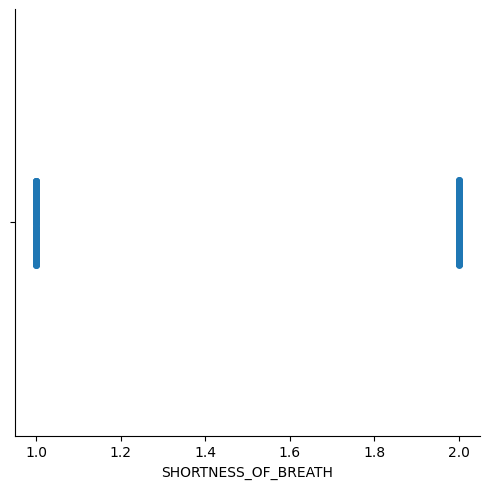

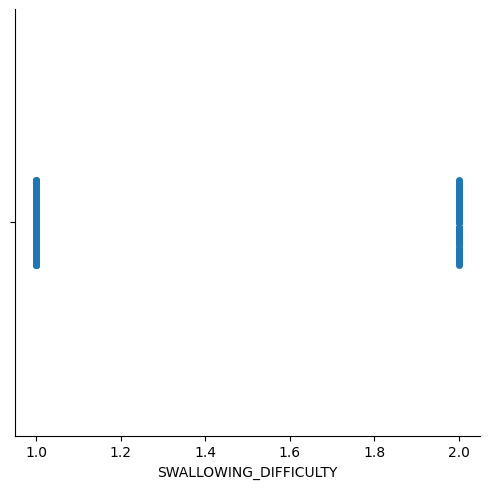

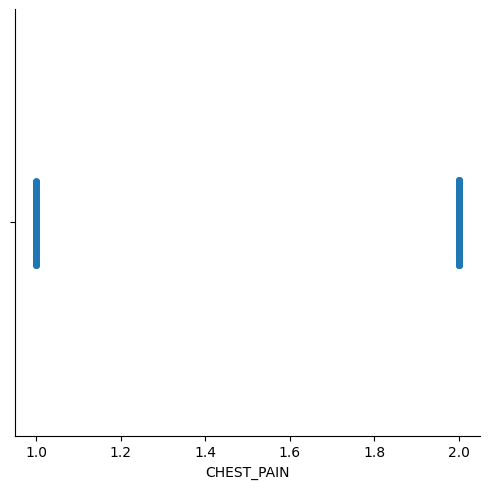

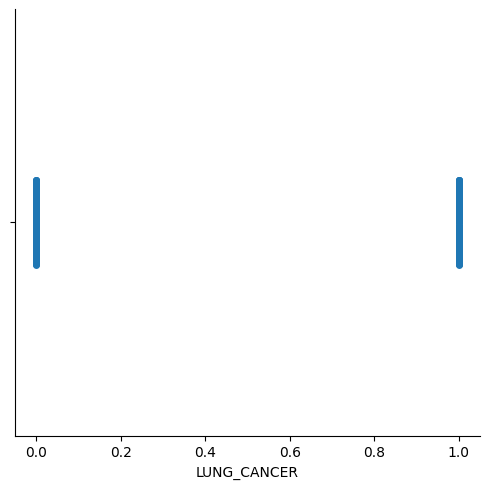

In [16]:
df = df[(df.AGE > 40)]
for col in df.columns:
    sns.catplot(x = col, data = df)

In [17]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

temp = X.iloc[:, :7]
tmep2 = X.iloc[:, 9:]
X  =pd.concat([temp, tmep2], axis=1)

In [18]:
X

X = (X - X.min()) / (X.max() - X.min())
X.sample(40)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
8,0.0,0.536585,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.243902,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
30,0.0,0.268293,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81,0.0,0.195122,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
24,1.0,0.634146,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
215,0.0,0.390244,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.536585,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.439024,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.536585,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,1.0,0.170732,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [19]:
X.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'WHEEZING', 'ALCOHOL_CONSUMING',
       'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY',
       'CHEST_PAIN'],
      dtype='object')

In [20]:
y.head(20)

115    1
260    1
25     1
100    1
123    1
141    1
73     1
242    1
255    1
113    1
131    1
144    1
63     1
90     1
46     1
254    1
128    1
292    1
113    1
236    1
Name: LUNG_CANCER, dtype: int64

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

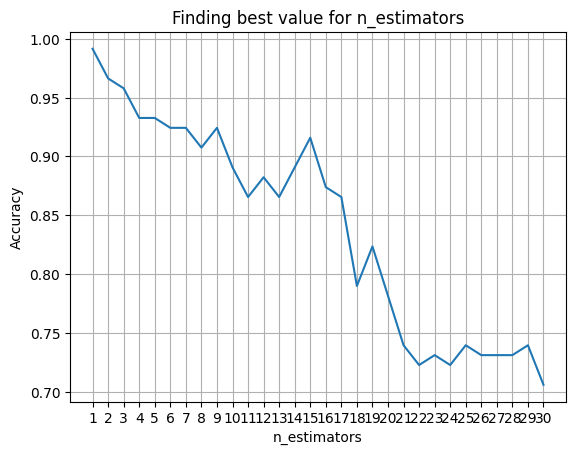

Highest value:  0.9915966386554622


In [25]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter ranges
n_neighbors_range = range(5, 31)
metric_options = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance', 'inverse_distance']

# Create parameter grid
param_grid = dict(n_neighbors=n_neighbors_range, metric=metric_options, weights=weights_options)

# Create KNN model and grid search object
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best parameters:', best_params)
# print('Best accuracy:', best_accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
260 fits failed out of a total of 780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-p

In [27]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [32]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [33]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 86.5546218487395
K Nearest neighbors: 99.15966386554622
Support Vector Classifier: 91.59663865546219
Naive Bayes: 83.19327731092437
Decision tree: 96.63865546218487
Random Forest: 98.31932773109243


In [35]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# CatBoost model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
predictions_catboost = catboost_model.predict(X_test)





# Set the number of folds
n_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store the scores
r2_scores = []
scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the CatBoost model on the training set
    catboost_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = catboost_model.predict(X_test)
    
    # Calculate the R-squared score
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)
    score = mean_squared_error(y_test, predictions)
    scores.append(score)

# Calculate the mean R-squared score
mean_r2 = sum(r2_scores) / n_folds * 100

print(f"Mean R-squared: {mean_r2:.2f}%")

# Calculate the mean and standard deviation of the scores
mean_score = sum(scores) / n_folds
std_dev = (sum((score - mean_score)**2 for score in scores) / (n_folds - 1))**0.5
print(f"Mean squared error: {mean_score:.2f} +/- {std_dev:.2f}")

Learning rate set to 0.03413
0:	learn: 0.4921005	total: 1.6ms	remaining: 1.6s
1:	learn: 0.4833040	total: 3.06ms	remaining: 1.52s
2:	learn: 0.4756990	total: 6.18ms	remaining: 2.05s
3:	learn: 0.4686029	total: 7.9ms	remaining: 1.97s
4:	learn: 0.4607232	total: 9.63ms	remaining: 1.92s
5:	learn: 0.4525685	total: 11.2ms	remaining: 1.86s
6:	learn: 0.4458752	total: 13.1ms	remaining: 1.86s
7:	learn: 0.4385508	total: 14.5ms	remaining: 1.8s
8:	learn: 0.4330070	total: 15.7ms	remaining: 1.73s
9:	learn: 0.4285637	total: 16.9ms	remaining: 1.67s
10:	learn: 0.4221739	total: 18.2ms	remaining: 1.64s
11:	learn: 0.4156598	total: 19.4ms	remaining: 1.6s
12:	learn: 0.4077265	total: 20.9ms	remaining: 1.59s
13:	learn: 0.4015795	total: 22.7ms	remaining: 1.6s
14:	learn: 0.3954628	total: 24ms	remaining: 1.57s
15:	learn: 0.3895302	total: 25.4ms	remaining: 1.56s
16:	learn: 0.3837982	total: 26.9ms	remaining: 1.55s
17:	learn: 0.3788429	total: 28.5ms	remaining: 1.55s
18:	learn: 0.3731916	total: 30ms	remaining: 1.55s
19:

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set the number of folds
n_folds = 5

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Define your Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Neural Network model on the training set
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy score
mean_accuracy = sum(accuracy_scores) / n_folds * 100

print(f"Neural Network: {mean_accuracy:.2f}%")

Neural Network: 90.37%


In [ ]:
ls = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

BestFitIndex = ls.index(max(ls))
BestFitModelName = ls_model[BestFitIndex]
BestFitModelName

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
#Creating a pickle file for making an API

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(BestFitModelName, pickle_out)
pickle_out.close()